Άνοιγμα αρχείου και προεργασία

In [ ]:
#Import the basic packages (we will import some more below)
from sklearn import datasets # Library for machine learning
import numpy as np # Library for math and arrays
np.set_printoptions(precision=3) # Tell numpy to print float numbers with 3-decimal precision
import matplotlib.pyplot as plt # Library for graphs and plots
from IPython.display import display, Markdown
from sklearn.datasets import fetch_openml
import pandas as pd

# Import label encoder
from sklearn import preprocessing


X, y_str = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#μετατροπη της y σε αριθμητική.
New_Y = label_encoder.fit_transform(y_str)

#Δημιουργw τους πίνακες x_train, y_train, x_test, y_test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = New_Y[:60000], New_Y[60000:]


#Τυπώστε το μέσο, τη διασπορά, το μέγιστο και το ελάχιστο κάθε στήλης του x_train και του x_test.
print("Average X_train:",np.mean(X_train, axis=0))
print("\n")
print("-------------------------------------------------------------------")
print("\n")
print("Average X_test:",np.mean(X_test, axis=0))
print("\n")
print("-------------------------------------------------------------------")
print("\n")
print("Variance X_train:",np.var(X_train, axis=0))
print("Variance X_test:",np.var(X_test, axis=0))
print("\n")
print("-------------------------------------------------------------------")
print("\n")
print("MAX X_train:",X_train.max(axis=0))
print("\n")
print("-------------------------------------------------------------------")
print("\n")
print("MAX X_test:",X_test.max(axis=0))
print("\n")
print("-------------------------------------------------------------------")
print("\n")
print("MIN X_train:",X_train.min(axis=0))
print("\n")
print("-------------------------------------------------------------------")
print("\n")
print("MIN X_test:",X_test.min(axis=0))
print("\n")

Average X_train: [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.100e-03 7.833e-03
 3.600e-03 1.500e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.667e-04 9.167e-04 9.283e-03
 2.428e-02 4.372e-02 6.410e-02 1.201e-01 1.607e-01 1.742e-01 1.774e-01
 1.893e-01 1.741e-01 1.869e-01 1.537e-01 1.001e-01 7.123e-02 5.382e-02
 2.137e-02 1.008e-02 3.533e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.067e-03 7.000e-04 6.950e-03 5.483e-03 4.710e-02
 1.384e-01 2.642e-01 5.066e-01 8.668e-01 1.290e+00 1.870e+00 2.530e+00
 3.202e+00 3.626e+00 3.722e+00 3.393e+00 2.803e+00 2.044e+00 1.202e+00
 6.334e-01 2.962e-01 9.398e-02 3.522e-02 8.633e-03 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 3.233e-03 5.850e-03 1.202e-02 6.977e-02 2.121e-01
 5.461e-01 1.154e+00 2.216e+00 3.640e+00 5.438e+00 7.407e+00

Πόσες διαστάσεις έχουν τα δεδομένα; Tα δεδομένα ειναι δισδιαστατα.

Σε πόσες κλάσεις ταξινομούνται;



3 Ταξινόμηση

3.1 Ταξινόμηση με όλα τα δεδομένα

In [ ]:
#k-Nearest Neighbors logo xamhlou kostous
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import time

pipeline=Pipeline([('Scaler',  StandardScaler()),
            ('kNNClassifier', KNeighborsClassifier())])

params = { 
           'kNNClassifier__n_neighbors':   range(1,7),
           'kNNClassifier__weights':   ['uniform', 'distance']
         }

start = time.time()

grid = GridSearchCV(estimator=pipeline, cv = 5, param_grid=params)

grid.fit(X_train, y_train) 
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

display(Markdown(
    "### Αποτελέσματα k-nearest neighbors classification:\n" +
    "**Best k**: {:.3f}".format(grid.best_params_['kNNClassifier__n_neighbors'])  + "<br>" +
    "**Best weighting**: {}".format(grid.best_params_['kNNClassifier__weights'])  + "<br>" +
    "**Best Cross-Val Accuracy**: {:.2f}".format(grid.best_score_) + "<br>" +
    "**Test Set Accuracy**: {:.2f}".format(accuracy_score(y_test, y_test_pred)) + "<br>" +
    "**Test Set F1**: {:.2f}".format(f1_score(y_test, y_test_pred,average='micro')) + "<br>" +
    "**Confusion matrix**:"
))

print("\n".join([' '.join(['{:4}'.format(item) for item in row]) 
      for row in confusion_matrix(y_test,y_test_pred)]))

stop = time.time()

### Αποτελέσματα k-nearest neighbors classification:
**Best k**: 4.000<br>**Best weighting**: distance<br>**Best Cross-Val Accuracy**: 0.95<br>**Test Set Accuracy**: 0.95<br>**Test Set F1**: 0.95<br>**Confusion matrix**:

 963    0    2    4    0    5    6    0    0    0
   0 1129    3    0    0    0    3    0    0    0
  12    4  965   18    4    0    6   11    9    3
   0    2    2  965    1   13    1   13    9    4
   1    7    4    2  927    2    7    5    3   24
   4    0    2   21    4  832   13    2    6    8
  11    4    1    0    2    7  931    0    2    0
   0   19   12    3    5    2    0  957    1   29
  14    2    5   19    9   22    4    7  887    5
   5    5    5   10   15    5    0   27    4  933


αξιολόγηση των αποτελεσμάτων

In [ ]:
#error rate me pososto epi ts 100

accuracy = accuracy_score(y_test, y_test_pred)

error_rate = (1 - accuracy) * 100

print("eror rate:" , error_rate)
print("Time:" , stop)

eror rate: 5.110000000000003
Time: 1643550859.803644


Time: 1643550859.803644


3.2 Μείωση διαστάσεων

In [ ]:
from sklearn.decomposition import PCA

start = time.time()
pca = PCA().fit( X_train )
stop = time.time()
print("Training time: ",stop - start)

print("Explained variance ratio with 100 principal components:", sum(pca.explained_variance_ratio_[0:199]))
print("Explained variance ratio with first principal component:", (pca.explained_variance_ratio_[0]))

Training time:  13.361491918563843
Explained variance ratio with 100 principal components: 0.9661630024873086
Explained variance ratio with first principal component: 0.09704664359713917


Bar chart

Text(0.5, 1.0, 'PCA')

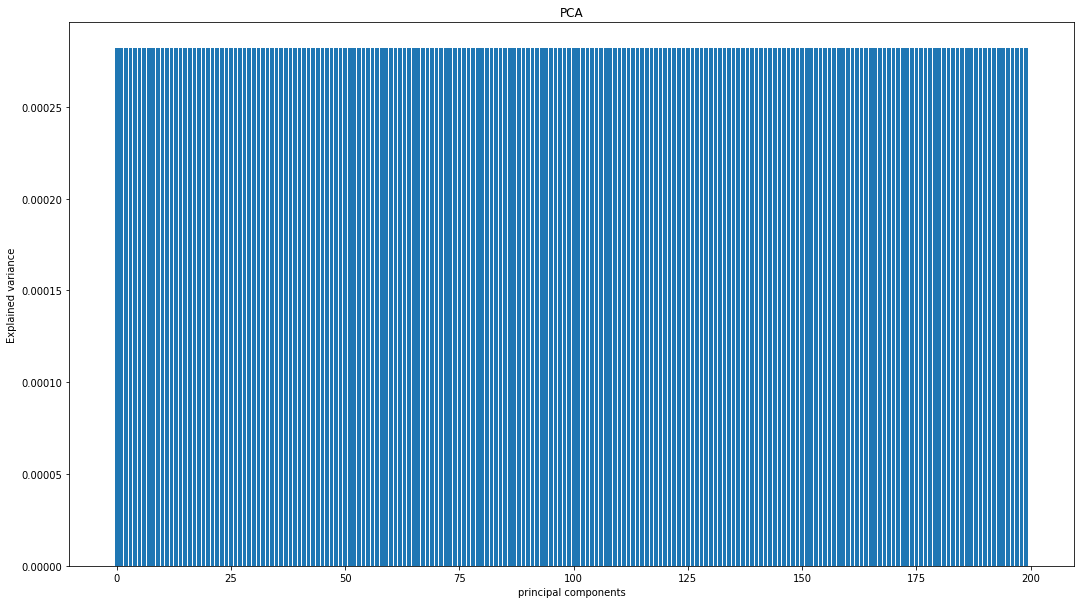

In [ ]:
plt.figure(figsize=(18,10))
plt.bar(range(200), pca.explained_variance_ratio_[200])
plt.ylabel("Explained variance")
plt.xlabel('principal components')
plt.title('PCA')



3.2 Ταξινόμηση στο χώρο των κύριων συνιστωσών

In [ ]:
#By simply applying .transform, we keep all the PCs that we have specified
X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)

pipeline=Pipeline([('Scaler',  StandardScaler()),
            ('kNNClassifier', KNeighborsClassifier())])

params = { 
           'kNNClassifier__n_neighbors':   range(1,7),
           'kNNClassifier__weights':   ['uniform', 'distance']
         }

start = time.time()

grid = GridSearchCV(estimator=pipeline, cv = 5, param_grid=params)

grid.fit(X_train_trans, y_train) 
y_train_pred = grid.predict(X_train_trans)
y_test_pred = grid.predict(X_test_trans)

display(Markdown(
    "### Αποτελέσματα k-nearest neighbors classification:\n" +
    "**Best k**: {:.3f}".format(grid.best_params_['kNNClassifier__n_neighbors'])  + "<br>" +
    "**Best weighting**: {}".format(grid.best_params_['kNNClassifier__weights'])  + "<br>" +
    "**Best Cross-Val Accuracy**: {:.2f}".format(grid.best_score_) + "<br>" +
    "**Test Set Accuracy**: {:.2f}".format(accuracy_score(y_test, y_test_pred)) + "<br>" +
    "**Test Set F1**: {:.2f}".format(f1_score(y_test, y_test_pred,average='micro')) + "<br>" +
    "**Confusion matrix**:"
))

print("\n".join([' '.join(['{:4}'.format(item) for item in row]) 
      for row in confusion_matrix(y_test,y_test_pred)]))

stop = time.time()
#isws na ftaei to scaling pou exw k 1 kai meta eror rate toso megalo

### Αποτελέσματα k-nearest neighbors classification:
**Best k**: 1.000<br>**Best weighting**: uniform<br>**Best Cross-Val Accuracy**: 0.68<br>**Test Set Accuracy**: 0.69<br>**Test Set F1**: 0.69<br>**Confusion matrix**:

 765  157    1   10    8   11   21    2    4    1
   0 1126    1    1    0    0    5    1    1    0
  22  383  488   61   10    5   27   18   10    8
   3  283   13  615    2   19    5   58    4    8
   2  245   11    3  595    6    8   32    4   76
   3  221    4   39    5  563   21    9   14   13
  22   93    8    5    3    9  815    1    2    0
   0   61    7   11   13    1    0  833    1  101
  15  419   12   25   12   74    8   13  368   28
   2   57    3   17   34    5    0  126    1  764


In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)

error_rate = (1 - accuracy) * 100

print("eror rate:" , error_rate)
print("Time:" , stop)

eror rate: 30.679999999999996
Time: 1643559397.5286481


In [23]:


from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()

for n in range (5,100,5):
  
  grid = GridSearchCV(estimator=clf, cv = 5, param_grid= n ) 
  display(Markdown(
   "**Cross-val explained variance**: {:.2f}".format(explained_variance_score(y_test_pred, y_train_pred)) ))


TypeError: ignored